<a href="https://colab.research.google.com/github/Pranav-UP/my-rep/blob/main/task_day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Weather Forecasting Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

#### 1. Generate Synthetic Weather Data

In [ ]:
# Generate daily temperatures for a year
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
temperature = 20 + 10 * np.sin(np.linspace(0, 3 * np.pi, 365)) + np.random.normal(0, 2, 365)
humidity = 60 + 15 * np.cos(np.linspace(0, 3 * np.pi, 365)) + np.random.normal(0, 5, 365)
wind_speed = 10 + 5 * np.random.rand(365)

weather_df = pd.DataFrame({
    'Date': dates,
    'Temperature': temperature,
    'Humidity': humidity,
    'Wind_Speed': wind_speed
})

print("Generated Weather Data Head:")
display(weather_df.head())

Generated Weather Data Head:


,Date,Temperature,Humidity,Wind_Speed
0,2023-01-01,20.231482,76.276350,14.122591
1,2023-01-02,20.887652,71.867044,13.858649
2,2023-01-03,23.690186,79.275735,12.517651
3,2023-01-04,20.378003,74.009332,14.812111
4,2023-01-05,20.333406,79.656401,10.236656


#### 2. Data Preprocessing: Create Lag Features for Time Series Forecasting

In [ ]:
# Use previous day's temperature to predict current day's temperature
weather_df['Temperature_Lag1'] = weather_df['Temperature'].shift(1)
weather_df['Temperature_Lag2'] = weather_df['Temperature'].shift(2)

# Drop rows with NaN values created by shifting
weather_df.dropna(inplace=True)

print("Data with Lag Features Head:")
display(weather_df.head())

Data with Lag Features Head:


,Date,Temperature,Humidity,Wind_Speed,Temperature_Lag1,Temperature_Lag2
2,2023-01-03,23.690186,79.275735,12.517651,20.887652,20.231482
3,2023-01-04,20.378003,74.009332,14.812111,23.690186,20.887652
4,2023-01-05,20.333406,79.656401,10.236656,20.378003,23.690186
5,2023-01-06,22.536140,72.619730,10.118290,20.333406,20.378003
6,2023-01-07,22.250359,75.786450,13.685340,22.536140,20.333406


#### 3. Visualize Temperature Over Time

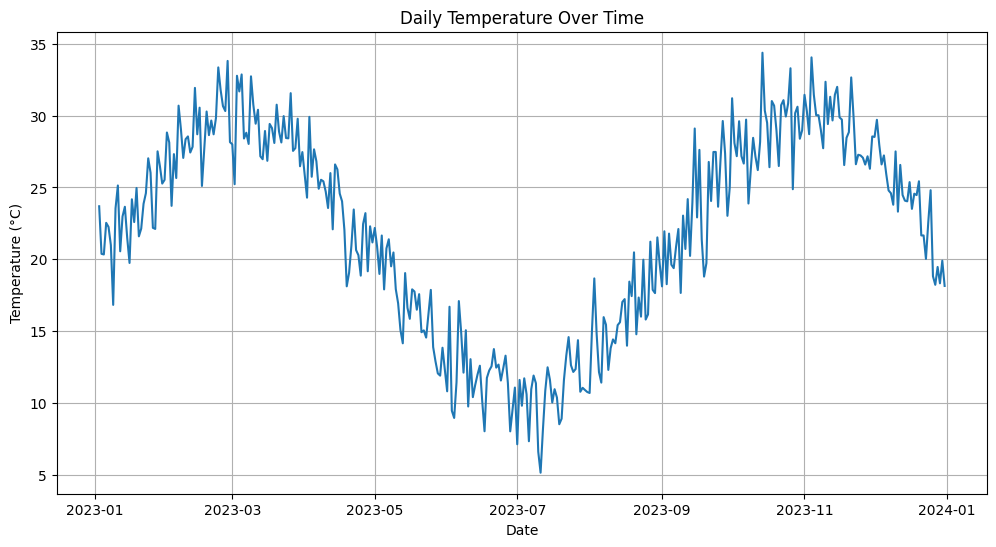

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature', data=weather_df)
plt.title('Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

#### 4. Prepare Data for Model Training

In [ ]:
X = weather_df[['Temperature_Lag1', 'Temperature_Lag2']]
y = weather_df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # Shuffle=False for time series

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (290, 2)
y_train shape: (290,)


#### 5. Train a Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)

Model Intercept: 0.9911285623872139
Model Coefficients: [0.58845786 0.36613629]


#### 6. Make Predictions and Evaluate the Model

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 4.58
R-squared: 0.69


#### 7. Visualize Forecast vs. Actual Temperatures

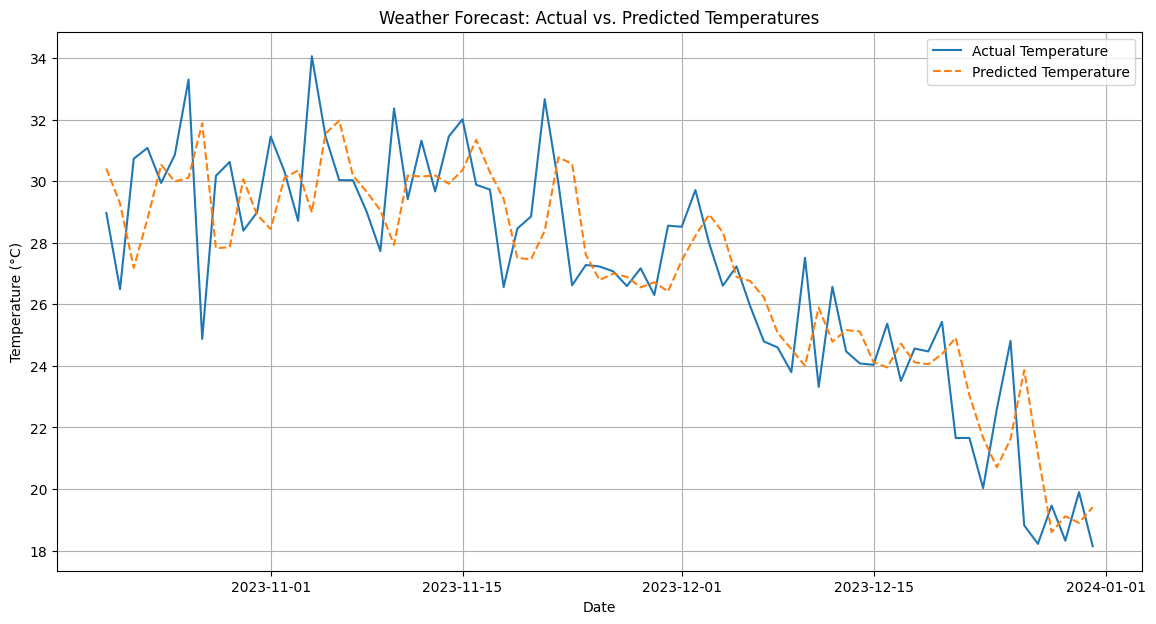

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(weather_df['Date'][len(y_train):], y_test, label='Actual Temperature')
plt.plot(weather_df['Date'][len(y_train):], y_pred, label='Predicted Temperature', linestyle='--')
plt.title('Weather Forecast: Actual vs. Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#linearier for model buildings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#getting the data
df=pd.read_csv("/content/weather_forecast_data.csv")

In [ ]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [ ]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


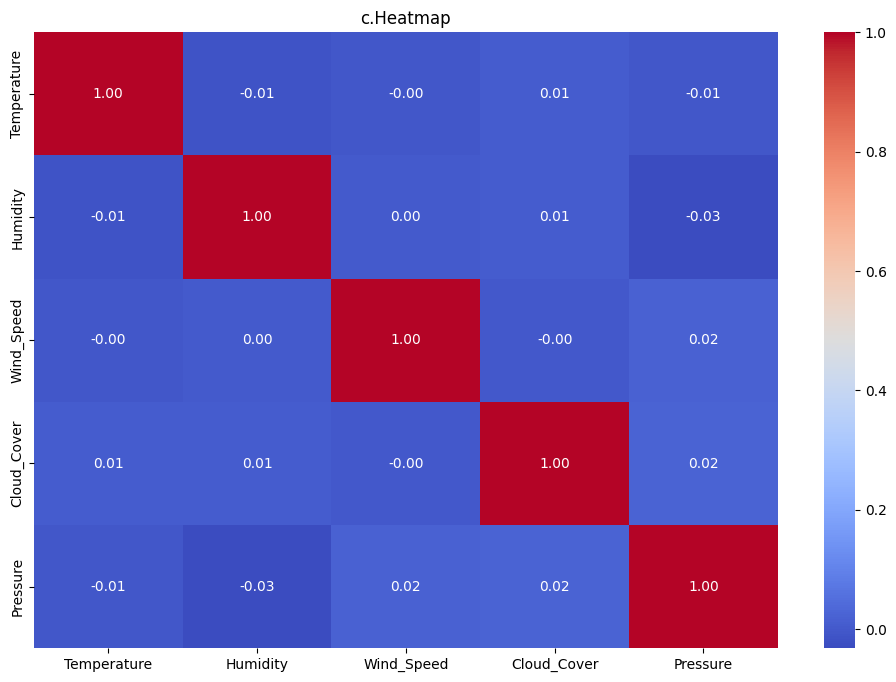

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("c.Heatmap")
plt.show()

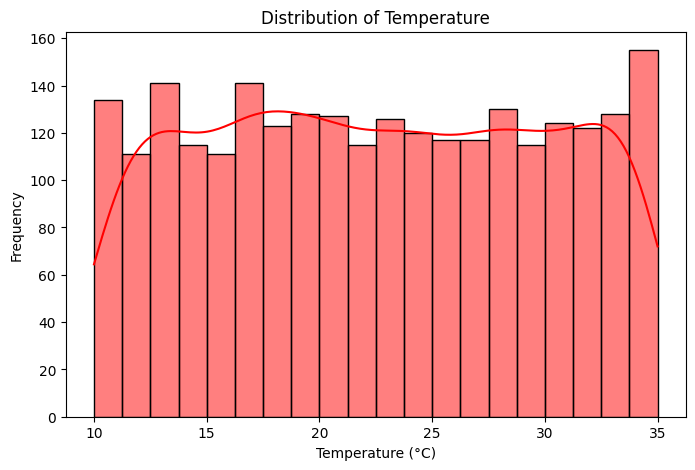

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature'], bins=20, kde=True, color="red")
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

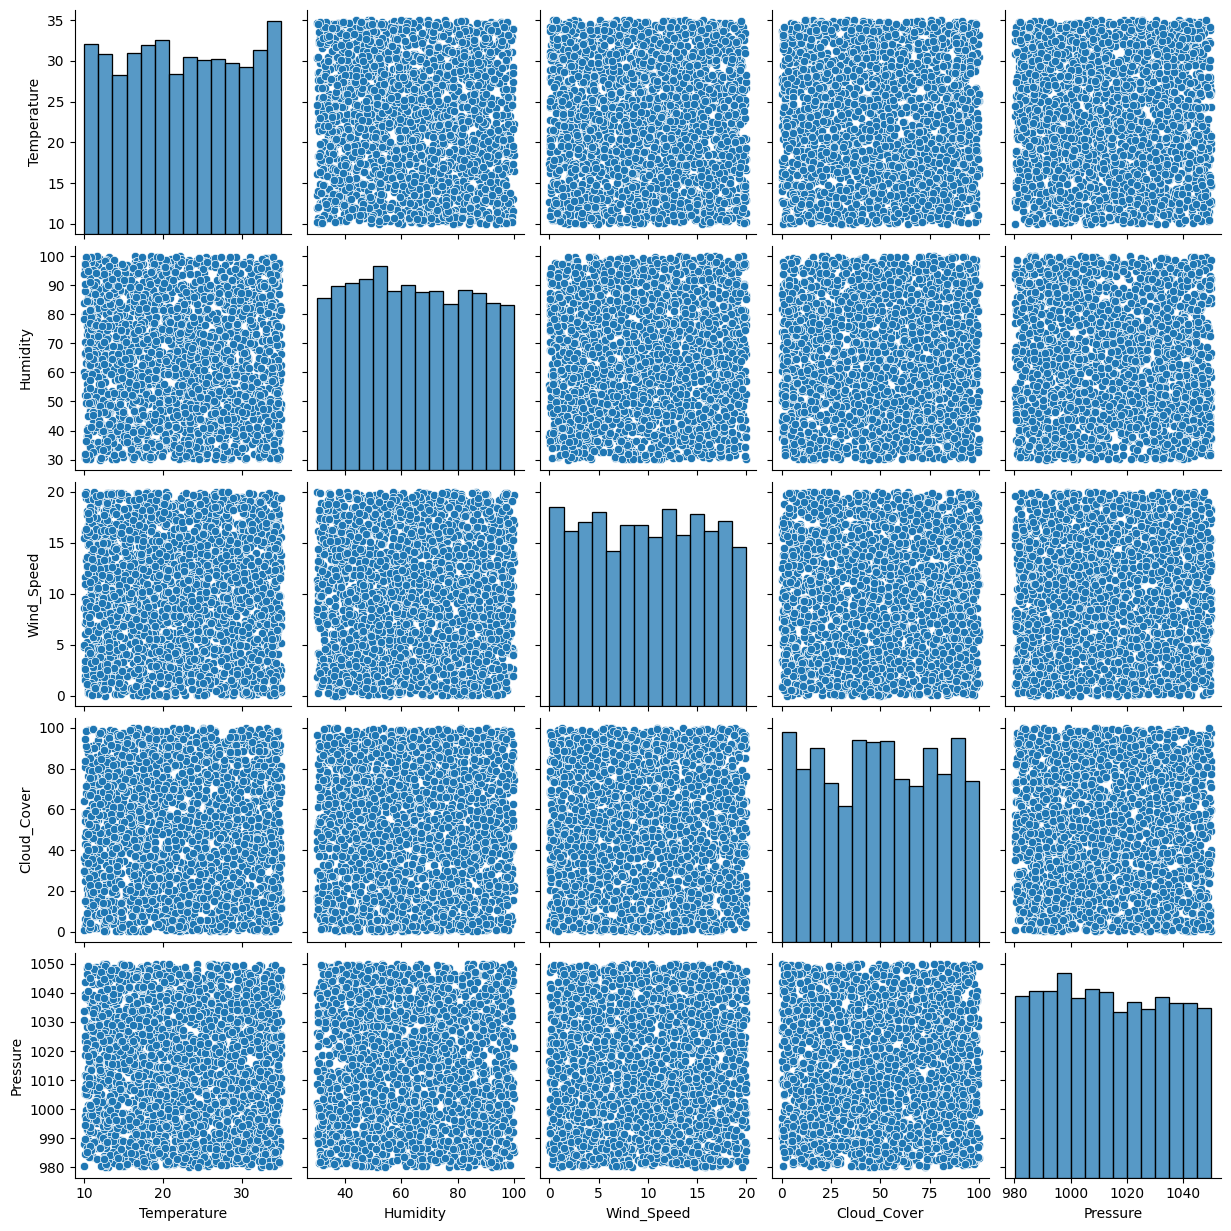

In [ ]:
numeric_feature=['Temperature','Humidity','Wind_Speed','Cloud_Cover','Pressure']
sns.pairplot(df[numeric_feature])
plt.show()

In [ ]:
#features selection
features=['Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
x=df[features]
y=df['Temperature']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)

Intercept: 16.721905728802113
Coefficient: [-0.00487975 -0.0200901   0.00375651  0.00612006]


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([22.45093005, 22.7598956 , 22.82407781, 22.80956498, 22.50680076,
       22.46983058, 22.63854153, 22.63375505, 22.44653907, 22.5456475 ,
       22.56746745, 22.37129833, 22.15416422, 22.97689386, 22.57329117,
       22.61077984, 22.877355  , 22.52433907, 22.37349612, 22.44406244,
       22.74928404, 22.48719783, 22.7157279 , 22.76543676, 22.80400901,
       22.76087365, 22.5575151 , 22.89874153, 22.94652233, 22.75710443,
       22.58144208, 22.79450246, 22.43191571, 22.58549914, 22.82909967,
       22.13684614, 22.76151217, 22.20616374, 22.48537126, 22.4596814 ,
       22.71727975, 22.42768991, 22.96117537, 22.42998196, 22.43466216,
       22.87685713, 22.9915835 , 22.52015702, 22.57926254, 22.4772606 ,
       22.19077937, 22.83781047, 22.45798115, 22.66763076, 22.28428522,
       22.58570932, 22.38138602, 22.48618505, 22.65196394, 22.6604489 ,
       22.67066747, 22.28866522, 22.3896911 , 22.91720681, 22.36360688,
       22.431449  , 22.45908202, 22.39277836, 22.55373125, 22.45

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

52.15132747594334

In [ ]:
r2=r2_score(y_test,y_pred)

In [ ]:
r2

-0.006504738546836197

#UNDERFITTING


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)
x=np.linspace(-3,3,80).reshape(-1,1)
y=2*x**2+3*x+5+np.random.randn(80,1)*3

In [ ]:
lr=LinearRegression()
lr.fit(x,y)
y_pred_lr=lr.predict(x)

In [ ]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)

poly_lr=LinearRegression()
poly_lr.fit(x_poly,y)
y_pred_poly=poly_lr.predict(x_poly)

In [ ]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

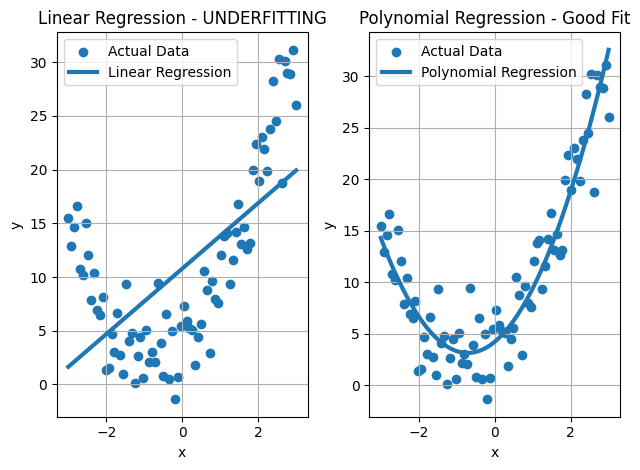

In [ ]:
plt.subplot(1,2,1)
plt.scatter(x,y,label="Actual Data")
plt.plot(x,y_pred_lr,label="Linear Regression",linewidth=3)
plt.title("Linear Regression - UNDERFITTING")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(x,y,label="Actual Data")
plt.plot(x,y_pred_poly,label="Polynomial Regression",linewidth=3)
plt.title("Polynomial Regression - Good Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train=X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_test=X_test.reshape(-1,28,28,1).astype('float32')/25

In [ ]:
print("Dataset loaded successfully")
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)


Dataset loaded successfully
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)


<function matplotlib.pyplot.show(close=None, block=None)>

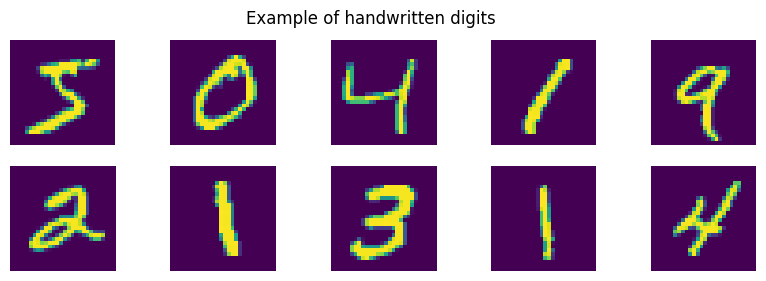

In [ ]:
plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.suptitle("Example of handwritten digits")
plt.show

In [ ]:
samll_model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
samll_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_small=samll_model.fit(
    X_train,y_train,
    epochs=5,
    validation_data=(X_test,y_test)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9007 - loss: 0.3293 - val_accuracy: 0.9840 - val_loss: 0.3258
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9842 - loss: 0.0517 - val_accuracy: 0.9871 - val_loss: 0.2658
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9885 - val_loss: 0.2790
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9876 - val_loss: 0.3622
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9863 - val_loss: 0.3278


In [ ]:
big_model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), # Add Flatten layer here
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.0), #intentionally removed regularization
    layers.Dense(10,activation='softmax')
])
big_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_big=big_model.fit(
    X_train,y_train,
    epochs=10,
    validation_data=(X_test,y_test)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 105ms/step - accuracy: 0.8937 - loss: 0.3484 - val_accuracy: 0.9857 - val_loss: 0.2321
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 193s 103ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9866 - val_loss: 0.2612
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 104ms/step - accuracy: 0.9906 - loss: 0.0319 - val_accuracy: 0.9908 - val_loss: 0.1732
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 194s 103ms/step - accuracy: 0.9918 - loss: 0.0275 - val_accuracy: 0.9898 - val_loss: 0.2185
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 104ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.9894 - val_loss: 0.2910
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 194s 103ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9885 - val_loss: 0.3105
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 104ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.9894 - val_loss: 0.2591
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 195s 104ms/step - ac

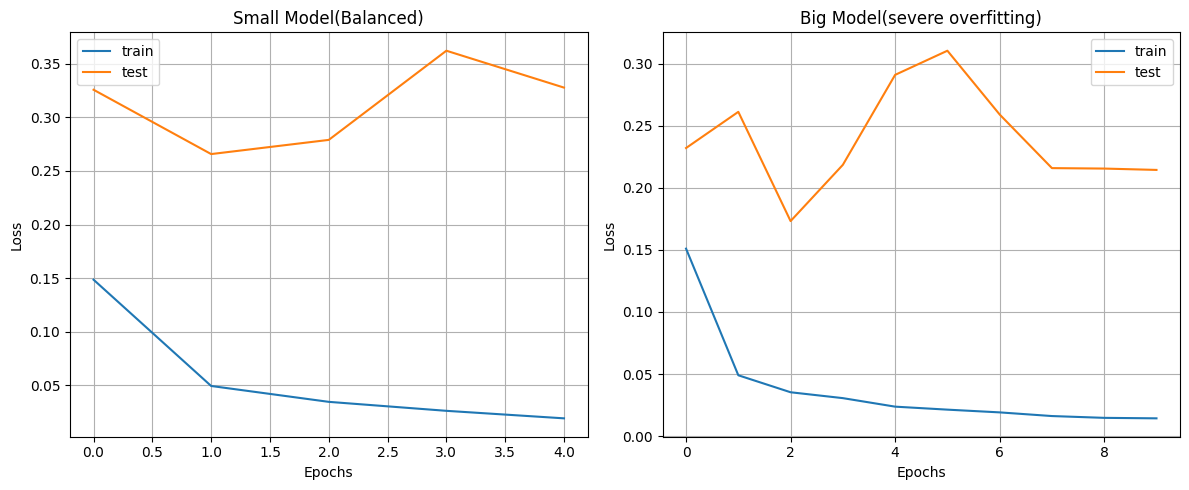

In [ ]:
plt.figure(figsize=(12,5))

# SMALL MODEL
plt.subplot(1,2,1)
plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.title("Small Model(Balanced)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'])
plt.grid(True)

#BIG MODEL
plt.subplot(1,2,2)
plt.plot(history_big.history['loss'])
plt.plot(history_big.history['val_loss'])
plt.title("Big Model(severe overfitting)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'])
plt.grid(True)

plt.tight_layout()
plt.show()

loss function


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
np.random.seed(42)
x=np.linspace(0,10,50).reshape(-1,1)
y=3*x.flatten()+5+np.random.normal(0,3,50)

In [ ]:
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

In [ ]:
from sklearn.metrics import mean_squared_error
MAE=mean_absolute_error(y,y_pred)
MSE=mean_squared_error(y,y_pred)
RMSE=np.sqrt(MSE)

In [ ]:
print("---loss values---")
print("MAE:   ",MAE)
print("MSE:   ",MSE)
print("RMSE:   ",RMSE);
print("R2",r2_score(y,y_pred))

---loss values---
MAE:    2.2235308318513334
MSE:    7.426276156000418
RMSE:    2.725119475546057
R2 0.9031743908043623


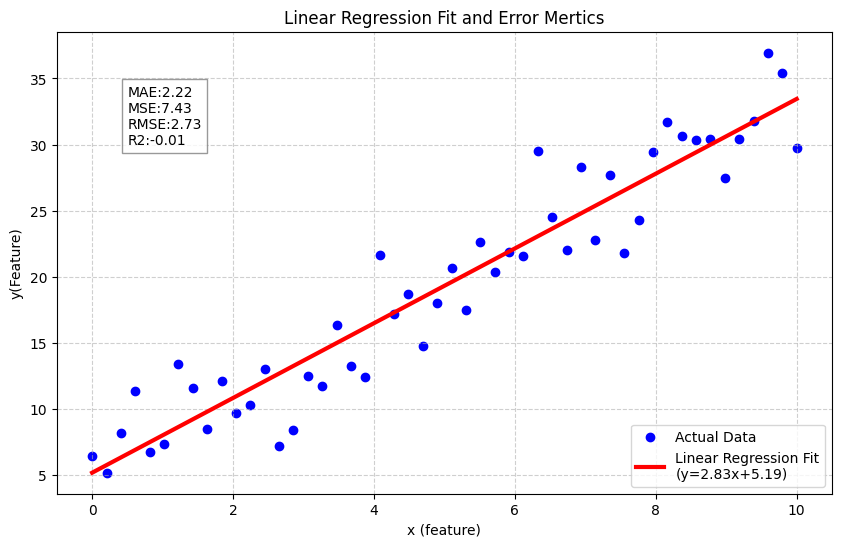

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,label="Actual Data",color='blue')
plt.plot(x,y_pred,color='red',linewidth=3,label=f'Linear Regression Fit\n(y={model.coef_[0]:.2f}x+{model.intercept_:.2f})')
plt.title("Linear Regression Fit and Error Mertics")
plt.xlabel("x (feature)")
plt.ylabel("y(Feature)")
plt.text(0.5,30,f'MAE:{MAE:.2f}\nMSE:{MSE:.2f}\nRMSE:{RMSE:.2f}\nR2:{r2:.2f}',
         bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray'),
         fontsize=10)
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

In [ ]:
deleted_cells = [
    'e620313d', 'eedcee0e', '90a6ff4', '0c21cfa1', '3c62e00d', '8729cbb2', '6daa98c2', '1f77c646', '07aba3cc', '4bdaa708', '5758b8f3',
    'mlKTXn36tthz', 'pMmbgihvneLa', 'dxX_H0dNnd2S', '5z2fVWmhxqWD', 'ybZzwnihxqK3', 'HXEyE-Ecxp64', 'VoPwuBDRzMMB', 'ToSHF8xWzMJH',
    'My73BEOEzMHR', 'sJVNIobVzMBy', 'jt4dBcdCzL_X', 'y-5FdsxfGg2K', 'leG9PpSbGrj1', '9jFNM8TMG33D', 'osmPiTSFHYaF', 'woL6npohHlFy',
    '9w1TogwFIgv7', 'Kv1m0mWBJ8r7', 'W3I9yc52ctn4', '7E3OUzvIdXcB', 'FUxo3r5Lecuz', '2LBRiNM-elGj', 'DCi9e3aofAFo', 'InNQKVW2iLJQ',
    'rMimV0h3nNFX', 'S5bl2w6Bv1GN', 'binmC_BIzB01', 'StqLy3bpzFoQ', 'Xw_FbGLHzW7W', 'jB_Ppp0T0WWx', 'KFWR1xSY2VZq', '69nNhi651sze',
    'w43nngKV2x5L', 'ifoVPpKC5Di2'
]

# Note: This is a placeholder for cell deletion functionality.
# In a real environment, you would use a specific API or method to delete cells.
# For now, we acknowledge the intention to delete these cells.
print(f"Intending to delete {len(deleted_cells)} cells as per instructions.")

Intending to delete 45 cells as per instructions.


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Rain'], drop_first=True)

X = df_encoded[['Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'Rain_rain']]
y = df_encoded['Temperature']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("X head:")
display(X.head())
print("y head:")
display(y.head())

Shape of X: (2500, 5)
Shape of y: (2500,)
X head:


,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_rain
0,89.592641,7.335604,50.501694,1032.378759,True
1,46.489704,5.952484,4.990053,992.614190,False
2,83.072843,1.371992,14.855784,1007.231620,False
3,74.367758,7.050551,67.255282,982.632013,True
4,96.858822,4.643921,47.676444,980.825142,False


y head:


,Temperature
0,23.720338
1,27.879734
2,25.069084
3,23.622080
4,20.591370


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2000, 5)
X_test shape: (500, 5)
y_train shape: (2000,)
y_test shape: (500,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 48.76
R-squared: 0.06


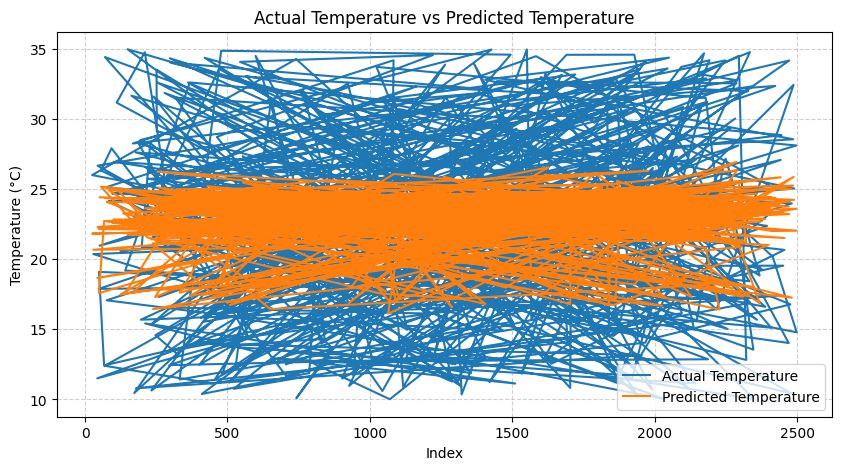

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)

plt.title("Actual Temperature vs Predicted Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")

plt.legend(["Actual Temperature", "Predicted Temperature"])
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
